## Title

In [1]:
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path

## 1.

In [2]:
# Loading phrasebank dataset
data_path = Path('../data/')
df_phrasebank = pl.read_csv(data_path / 'processed/financial_phrasebank_google_translate_es.csv')
df_phrasebank.group_by('label').count()

C:\Users\eucli\AppData\Local\Temp\ipykernel_21916\2179130930.py:4: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  df_phrasebank.group_by('label').count()


label,count
i64,u32
2,1359
0,601
1,2870


In [3]:
# Loading original dataset
df_original = pl.read_csv(data_path / 'raw/financial_news.csv')
df_original.group_by('target_sentiment').count()

C:\Users\eucli\AppData\Local\Temp\ipykernel_21916\3341699352.py:3: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  df_original.group_by('target_sentiment').count()


target_sentiment,count
str,u32
"""negative""",3891
"""neutral""",880
"""positive""",4114


## Combining datasets

In [4]:
# Selecting columns from the original dataset
df_original = df_original.select(['text', 'target_sentiment'])
# Setting columns names from phrasebank dataset
df_phrasebank = df_phrasebank.select(['sentence_es_googletranslate', 'label']).rename({'sentence_es_googletranslate': 'text'}).rename({'label': 'target_sentiment'})


In [5]:
label_mapping = {'negative': 'Negative', 'neutral': 'Neutral', 'positive': 'Positive'}
df_original = df_original.with_columns(
    pl.col('target_sentiment')
    .replace_strict(label_mapping)
    .alias('target_sentiment')
    )

In [6]:
# Create mapping for labels
label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
# Mapping labels to text
df_phrasebank = df_phrasebank.with_columns(
    pl.col('target_sentiment')
    .replace_strict(label_mapping)
    .alias('target_sentiment')
    )


In [7]:
# Combining datasets
df_combined = pl.concat([df_original, df_phrasebank])
df_combined.group_by('target_sentiment').count()

C:\Users\eucli\AppData\Local\Temp\ipykernel_21916\1338074658.py:3: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  df_combined.group_by('target_sentiment').count()


target_sentiment,count
str,u32
"""Neutral""",3750
"""Negative""",4492
"""Positive""",5473


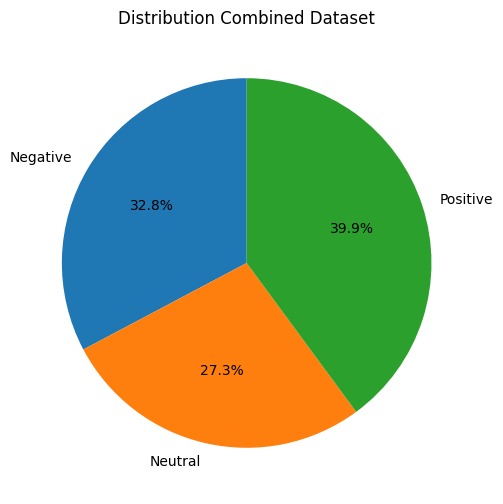

In [8]:
# Plotting the distribution of target sentiments 
value_counts_df = df_combined['target_sentiment'].value_counts(normalize=True).sort('target_sentiment')
proportions = value_counts_df['proportion'].to_list()

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(proportions, labels=value_counts_df['target_sentiment'], autopct='%1.1f%%', startangle=90) 
ax.set_title('Distribution Combined Dataset')
plt.show()

In [ ]:
df_combined.write_csv(data_path / 'processed/financial_news_combined_original-phrasebank.csv')